# Libraries

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Question 1

In [18]:
df = pd.read_csv("data.csv")
india = gpd.read_file("https://github.com/deldersveld/topojson/raw/master/countries/india/india-states.json")

In [19]:
df

,Capital,Latitude,Longitude,Population
0,Amaravati,16.5062,80.6480,442631
1,Itanagar,27.1004,93.6184,103758
2,Dispur,26.1445,91.7362,109079
3,Patna,25.5941,85.1376,2123191
4,Raipur,21.2514,81.6296,2118667
5,Panaji,15.4909,73.8278,113166
6,Gandhinagar,23.2156,72.6369,120197
7,Chandigarh,30.7333,76.7794,1054686
8,Shimla,31.1048,77.1734,176309
9,Ranchi,23.3441,85.3096,1466766


In [30]:
df[df["Population"] == df['Population'].max()]

,Capital,Latitude,Longitude,Population
27,Delhi,28.66,77.23,29617000


In [20]:
capitals_df = gpd.GeoDataFrame({"City": df['Capital'], "Longitude": df['Longitude'], "Latitude": df['Latitude'], "Population": df['Population']})

In [21]:
print(capitals_df)

                  City  Longitude  Latitude  Population
0            Amaravati    80.6480   16.5062      442631
1             Itanagar    93.6184   27.1004      103758
2               Dispur    91.7362   26.1445      109079
3                Patna    85.1376   25.5941     2123191
4               Raipur    81.6296   21.2514     2118667
5               Panaji    73.8278   15.4909      113166
6          Gandhinagar    72.6369   23.2156      120197
7           Chandigarh    76.7794   30.7333     1054686
8               Shimla    77.1734   31.1048      176309
9               Ranchi    85.3096   23.3441     1466766
10           Bengaluru    77.5946   12.9724    11386488
11  Thiruvananthapuram    76.9366    8.5241      975440
12              Bhopal    77.4126   23.2599     1917160
13              Mumbai    72.8777   19.0760    12442373
14              Imphal    93.9368   24.8170      228036
15            Shillong    91.8862   25.5722      148339
16              Aizawl    92.7184   23.7367     

In [22]:
capitals_df['geometry'] = capitals_df.apply(lambda x: Point(x[1], x[2]), axis=1)

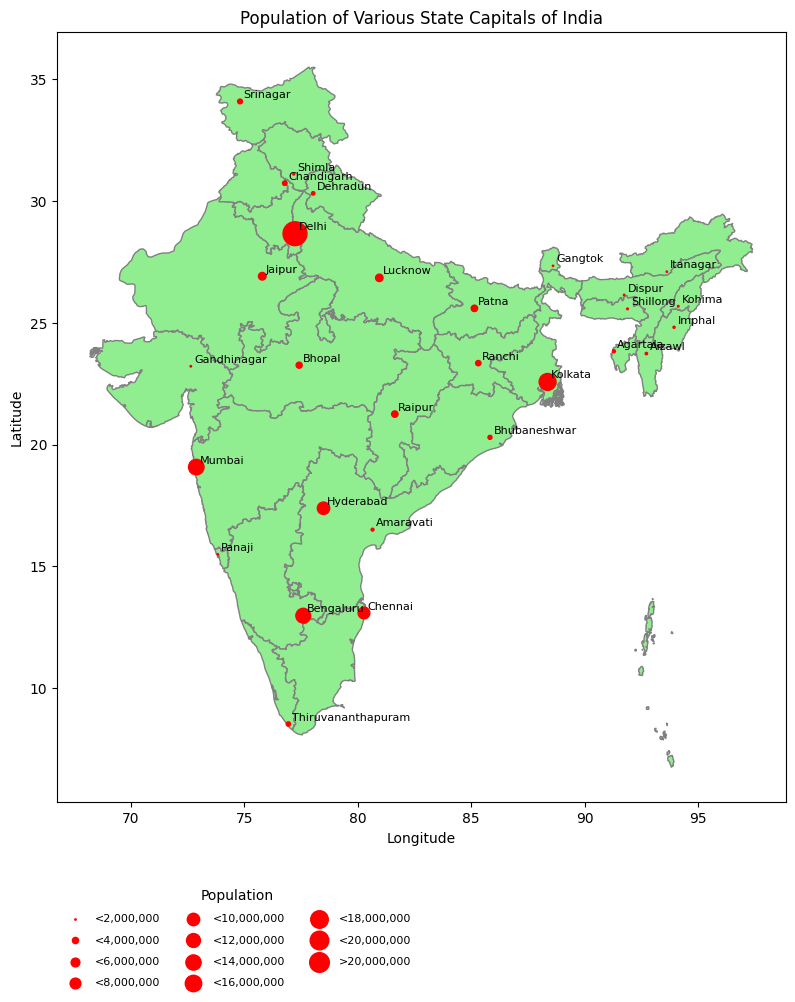

In [61]:
capitals_df.crs = {'init': 'epsg:4326'}
india.crs = {'init': 'epsg:4326'}

fig, ax = plt.subplots(figsize=(10,10))
india.plot(ax=ax, color='lightgreen', edgecolor='gray')


for i, row in capitals_df.iterrows():
    ax.annotate(row['City'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(row.geometry.x + 0.15, row.geometry.y + 0.15),
                fontsize=8)


#Add legend for bubble size from mimimum to maximum at the bottom of the map with a step size of 1,000,000

plt.scatter([], [], c='red', alpha=1, s=1,
           label='<2,000,000')

plt.scatter([], [], c='red', alpha=1, s=20,
            label='<4,000,000')
plt.scatter([], [], c='red', alpha=1, s=40,
            label='<6,000,000')
plt.scatter([], [], c='red', alpha=1, s=60,
            label='<8,000,000')
plt.scatter([], [], c='red', alpha=1, s=80,
            label='<10,000,000')
plt.scatter([], [], c='red', alpha=1, s=100, 
            label='<12,000,000')
plt.scatter([], [], c='red', alpha=1, s=120,
            label='<14,000,000')
plt.scatter([], [], c='red', alpha=1, s=140,
            label='<16,000,000')
plt.scatter([], [], c='red', alpha=1, s=160,
            label='<18,000,000')
plt.scatter([], [], c='red', alpha=1, s=180,
            label='<20,000,000')
plt.scatter([], [], c='red', alpha=1, s=200,
            label='>20,000,000')
plt.legend(scatterpoints=1, frameon=False,
              labelspacing=1, title='Population', bbox_to_anchor=(0.5, -0.1), loc='best', ncol=3, fontsize = 8)

#Shift the legend to the bottom left of the map
# plt.legend()

#Reduce the font size of the population values mentioned in legend
# plt.legend(fontsize=8)

capitals_df.plot(ax=ax, marker='o', color= 'red', markersize=capitals_df['Population']/100000)

plt.title("Population of Various State Capitals of India")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



# Question 2

In [64]:
def get_location(city):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.geocode(city)
    return location.latitude, location.longitude

In [65]:
df = pd.read_csv("Flightschedule.csv")

In [67]:
df

,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days of Operations,Connection,Effective From,Effective To
0,Abu Dhabi,Ahmedabad,G8 6,23:30,14:10,13:10,Via BOM,Sa,G8 247,02/03/2023,02/05/2023
1,Abu Dhabi,Ahmedabad,G8 6,23:30,14:35,13:35,Via BOM,"M,W,Th,F,Sa,Su",G8 2504,02/03/2023,02/05/2023
2,Abu Dhabi,Ahmedabad,G8 6,23:30,18:25,17:25,Via BOM,Daily,G8 364,02/03/2023,02/05/2023
3,Abu Dhabi,Ahmedabad,G8 6,23:30,08:55,07:55,Via BOM,Daily,G8 365,02/03/2023,02/05/2023
4,Abu Dhabi,Ahmedabad,G8 76,21:40,07:35,08:25,Via DEL,"M,Tu,W,Th,F,Su",G8 719,02/03/2023,02/11/2023
...,...,...,...,...,...,...,...,...,...,...,...
3239,Varanasi,Pune,G8 768,21:00,06:15,09:15,Via AMD,"M,Tu,Th,F,Sa,Su",G8 715,02/03/2023,03/24/2023
3240,Varanasi,Ranchi,G8 382,11:15,19:25,08:10,Via BOM,Su,G8 387,02/03/2023,02/15/2023
3241,Varanasi,Srinagar,G8 183,18:40,08:25,13:45,Via DEL,Sa,G8 259,02/03/2023,02/04/2023
3242,Varanasi,Srinagar,G8 183,18:40,08:25,13:45,Via DEL,"M,Th",G8 259,02/03/2023,02/09/2023


In [68]:
routing_dict = {
    'Via BOM': 'Mumbai',
    'Via DEL': 'Delhi',
    'Via CNN': 'Kannur',
    'Via CCU': 'Kolkata',
    'Via GOI': 'Goa',
    'Via LKO': 'Lucknow',
    'Via PNQ': 'Pune',
    'Via HYD': 'Hyderabad',
    'Via BLR': 'Bangalore',
    'Via IXC': 'Chandigarh',
    'Via GAU': 'Guwahati',
    'Via AMD': 'Ahmedabad',
    'Via PAT': 'Patna',
    'Via IXR': 'Ranchi',
    'Via COK': 'Kochi',
    'Via SXR': 'Srinagar',
    'Via IXB': 'Bagdogra',
    'Via IXL': 'Leh',
    'Via JAI': 'Jaipur',
    'Via NAG': 'Nagpur',
    'Via VNS': 'Varanasi',
    'Via IXJ': 'Jammu',
    'Via GOX': 'Gorakhpur',
    'Via MAA': 'Chennai'
}
df['Routing'] = df['Routing'].map(routing_dict)

In [69]:
df

,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days of Operations,Connection,Effective From,Effective To
0,Abu Dhabi,Ahmedabad,G8 6,23:30,14:10,13:10,Mumbai,Sa,G8 247,02/03/2023,02/05/2023
1,Abu Dhabi,Ahmedabad,G8 6,23:30,14:35,13:35,Mumbai,"M,W,Th,F,Sa,Su",G8 2504,02/03/2023,02/05/2023
2,Abu Dhabi,Ahmedabad,G8 6,23:30,18:25,17:25,Mumbai,Daily,G8 364,02/03/2023,02/05/2023
3,Abu Dhabi,Ahmedabad,G8 6,23:30,08:55,07:55,Mumbai,Daily,G8 365,02/03/2023,02/05/2023
4,Abu Dhabi,Ahmedabad,G8 76,21:40,07:35,08:25,Delhi,"M,Tu,W,Th,F,Su",G8 719,02/03/2023,02/11/2023
...,...,...,...,...,...,...,...,...,...,...,...
3239,Varanasi,Pune,G8 768,21:00,06:15,09:15,Ahmedabad,"M,Tu,Th,F,Sa,Su",G8 715,02/03/2023,03/24/2023
3240,Varanasi,Ranchi,G8 382,11:15,19:25,08:10,Mumbai,Su,G8 387,02/03/2023,02/15/2023
3241,Varanasi,Srinagar,G8 183,18:40,08:25,13:45,Delhi,Sa,G8 259,02/03/2023,02/04/2023
3242,Varanasi,Srinagar,G8 183,18:40,08:25,13:45,Delhi,"M,Th",G8 259,02/03/2023,02/09/2023


In [70]:
df_new = [df['Origin'], df['Destination'], df['Routing']]
df_new = pd.DataFrame(df_new).transpose()
df_new.dropna(inplace=True)

In [71]:
df_1 = [df_new['Origin'], df_new['Routing']]
df_1 = pd.DataFrame(df_1).transpose()
df_2 = [df_new['Routing'], df_new['Destination']]
df_2 = pd.DataFrame(df_2).transpose()

In [72]:
df_1.drop_duplicates(inplace=True)
df_2.drop_duplicates(inplace=True)

In [73]:
international_cities = ['Abu Dhabi', 'Dubai', 'Phuket', 'Bangkok', 'Dammam', 'Kuwait', 'Muscat', 'Male']

df_1 = df_1[~df_1['Origin'].isin(international_cities)]
df_1 = df_1[~df_1['Routing'].isin(international_cities)]
df_2 = df_2[~df_2['Routing'].isin(international_cities)]
df_2 = df_2[~df_2['Destination'].isin(international_cities)]

In [74]:
df_2

,Routing,Destination
0,Mumbai,Ahmedabad
4,Delhi,Ahmedabad
6,Mumbai,Amritsar
8,Delhi,Bagdogra
11,Delhi,Bengaluru
...,...,...
2385,Chennai,Port Blair
2417,Nagpur,Pune
2552,Pune,Ahmedabad
2799,Chennai,Mumbai


In [75]:
total_cities = []

In [76]:
#find the unique cities in df_1 and df_2, both origin and destination and add them to total_cities
total_cities = df_1['Origin'].unique().tolist() + df_1['Routing'].unique().tolist() + df_2['Routing'].unique().tolist() + df_2['Destination'].unique().tolist()

In [77]:
city_dict = {}

#find the latitude and longitude of each city in total_cities and add them to city_dict along with name of city
for city in total_cities:
    city_dict[city] = get_location(city)
    

In [78]:
city_dict

{'Ahmedabad': (23.0216238, 72.5797068),
 'Amritsar': (31.6343083, 74.8736788),
 'Bagdogra': (26.6988847, 88.3200303),
 'Bengaluru': (12.9767936, 77.590082),
 'Chandigarh': (30.72984395, 76.78414567016054),
 'Chennai': (13.0836939, 80.270186),
 'Dehra Dun': (30.3255646, 78.0436813),
 'Delhi': (28.6517178, 77.2219388),
 'Goa': (15.3004543, 74.0855134),
 'Goa-New Goa': (15.486913, 73.818794),
 'Guwahati': (26.1805978, 91.753943),
 'Hyderabad': (17.360589, 78.4740613),
 'Jaipur': (26.9154576, 75.8189817),
 'Jammu': (32.7185614, 74.8580917),
 'Kannur': (11.8763836, 75.3737973),
 'Kochi': (9.9674277, 76.2454436),
 'Kolkata': (22.5726459, 88.3638953),
 'Leh': (34.1642029, 77.5848133),
 'Lucknow': (26.8381, 80.9346001),
 'Mumbai': (19.0785451, 72.878176),
 'Nagpur': (21.1498134, 79.0820556),
 'Patna': (25.6093239, 85.1235252),
 'Port Blair': (11.6645348, 92.7390448),
 'Pune': (18.521428, 73.8544541),
 'Ranchi': (23.3700501, 85.3250387),
 'Srinagar': (34.0747444, 74.8204443),
 'Varanasi': (25.3

In [79]:
#convert the city_dict to a dataframe having 3 columns named City, Latitude and Longitude and another column for indexing numerically
city_df = pd.DataFrame.from_dict(city_dict, orient = "index", columns=['Latitude', 'Longitude'])

#add an indexing column to city_df
city_df['City'] = city_df.index

#reset indexing to numeric
city_df.reset_index(drop=True, inplace=True)

In [80]:
city_df

,Latitude,Longitude,City
0,23.021624,72.579707,Ahmedabad
1,31.634308,74.873679,Amritsar
2,26.698885,88.320030,Bagdogra
3,12.976794,77.590082,Bengaluru
4,30.729844,76.784146,Chandigarh
5,13.083694,80.270186,Chennai
6,30.325565,78.043681,Dehra Dun
7,28.651718,77.221939,Delhi
8,15.300454,74.085513,Goa
9,15.486913,73.818794,Goa-New Goa


In [81]:
city_dict_new = {}

In [82]:
#find the connections of each city in total_cities using df_1 and add them to city_dict_new along with name of city

for city in total_cities:
    city_dict_new[city] = df_1[df_1['Origin'] == city]['Routing'].unique().tolist()

#append the connections of each city in total_cities using df_2 to city_dict along with name of city

for city in total_cities:
    city_dict_new[city] = city_dict_new[city] + df_2[df_2['Routing'] == city]['Destination'].unique().tolist()

In [83]:
city_dict_new

{'Ahmedabad': ['Mumbai',
  'Delhi',
  'Kolkata',
  'Goa',
  'Lucknow',
  'Pune',
  'Hyderabad',
  'Bangalore',
  'Chandigarh',
  'Chandigarh',
  'Delhi',
  'Hyderabad',
  'Kolkata',
  'Lucknow',
  'Patna',
  'Varanasi',
  'Bengaluru',
  'Goa',
  'Mumbai',
  'Pune',
  'Chandigarh',
  'Delhi',
  'Hyderabad',
  'Kolkata',
  'Lucknow',
  'Patna',
  'Varanasi',
  'Bengaluru',
  'Goa',
  'Mumbai',
  'Pune',
  'Chandigarh',
  'Delhi',
  'Hyderabad',
  'Kolkata',
  'Lucknow',
  'Patna',
  'Varanasi',
  'Bengaluru',
  'Goa',
  'Mumbai',
  'Pune',
  'Chandigarh',
  'Delhi',
  'Hyderabad',
  'Kolkata',
  'Lucknow',
  'Patna',
  'Varanasi',
  'Bengaluru',
  'Goa',
  'Mumbai',
  'Pune'],
 'Amritsar': ['Mumbai'],
 'Bagdogra': ['Delhi',
  'Kolkata',
  'Guwahati',
  'Guwahati',
  'Kolkata',
  'Guwahati',
  'Kolkata',
  'Guwahati',
  'Kolkata',
  'Guwahati',
  'Kolkata'],
 'Bengaluru': ['Delhi',
  'Mumbai',
  'Goa',
  'Ahmedabad',
  'Pune',
  'Lucknow',
  'Patna',
  'Ranchi',
  'Kolkata',
  'Kochi'],
 

In [84]:
#add a column to city_df with the connections of each city
city_df['Connections'] = city_df.City.map(city_dict_new)

In [85]:
city_df

,Latitude,Longitude,City,Connections
0,23.021624,72.579707,Ahmedabad,"[Mumbai, Delhi, Kolkata, Goa, Lucknow, Pune, H..."
1,31.634308,74.873679,Amritsar,[Mumbai]
2,26.698885,88.320030,Bagdogra,"[Delhi, Kolkata, Guwahati, Guwahati, Kolkata, ..."
3,12.976794,77.590082,Bengaluru,"[Delhi, Mumbai, Goa, Ahmedabad, Pune, Lucknow,..."
4,30.729844,76.784146,Chandigarh,"[Mumbai, Ahmedabad, Srinagar, Srinagar, Mumbai..."
5,13.083694,80.270186,Chennai,"[Mumbai, Port Blair, Mumbai, Port Blair, Mumba..."
6,30.325565,78.043681,Dehra Dun,[Mumbai]
7,28.651718,77.221939,Delhi,"[Mumbai, Kolkata, Ranchi, Ahmedabad, Pune, Goa..."
8,15.300454,74.085513,Goa,"[Mumbai, Bangalore, Delhi, Ahmedabad, Bengalur..."
9,15.486913,73.818794,Goa-New Goa,"[Mumbai, Bangalore]"


In [86]:
# Create geometry column with Point objects
geometry = [Point(xy) for xy in zip(city_df['Longitude'], city_df['Latitude'])]
airports_df = gpd.GeoDataFrame(city_df, geometry=geometry)

airports_df['Size'] = airports_df['Connections'].apply(lambda x: len(x))
# Load map of India
india_map = gpd.read_file("https://github.com/deldersveld/topojson/raw/master/countries/india/india-states.json")

/Users/sam/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


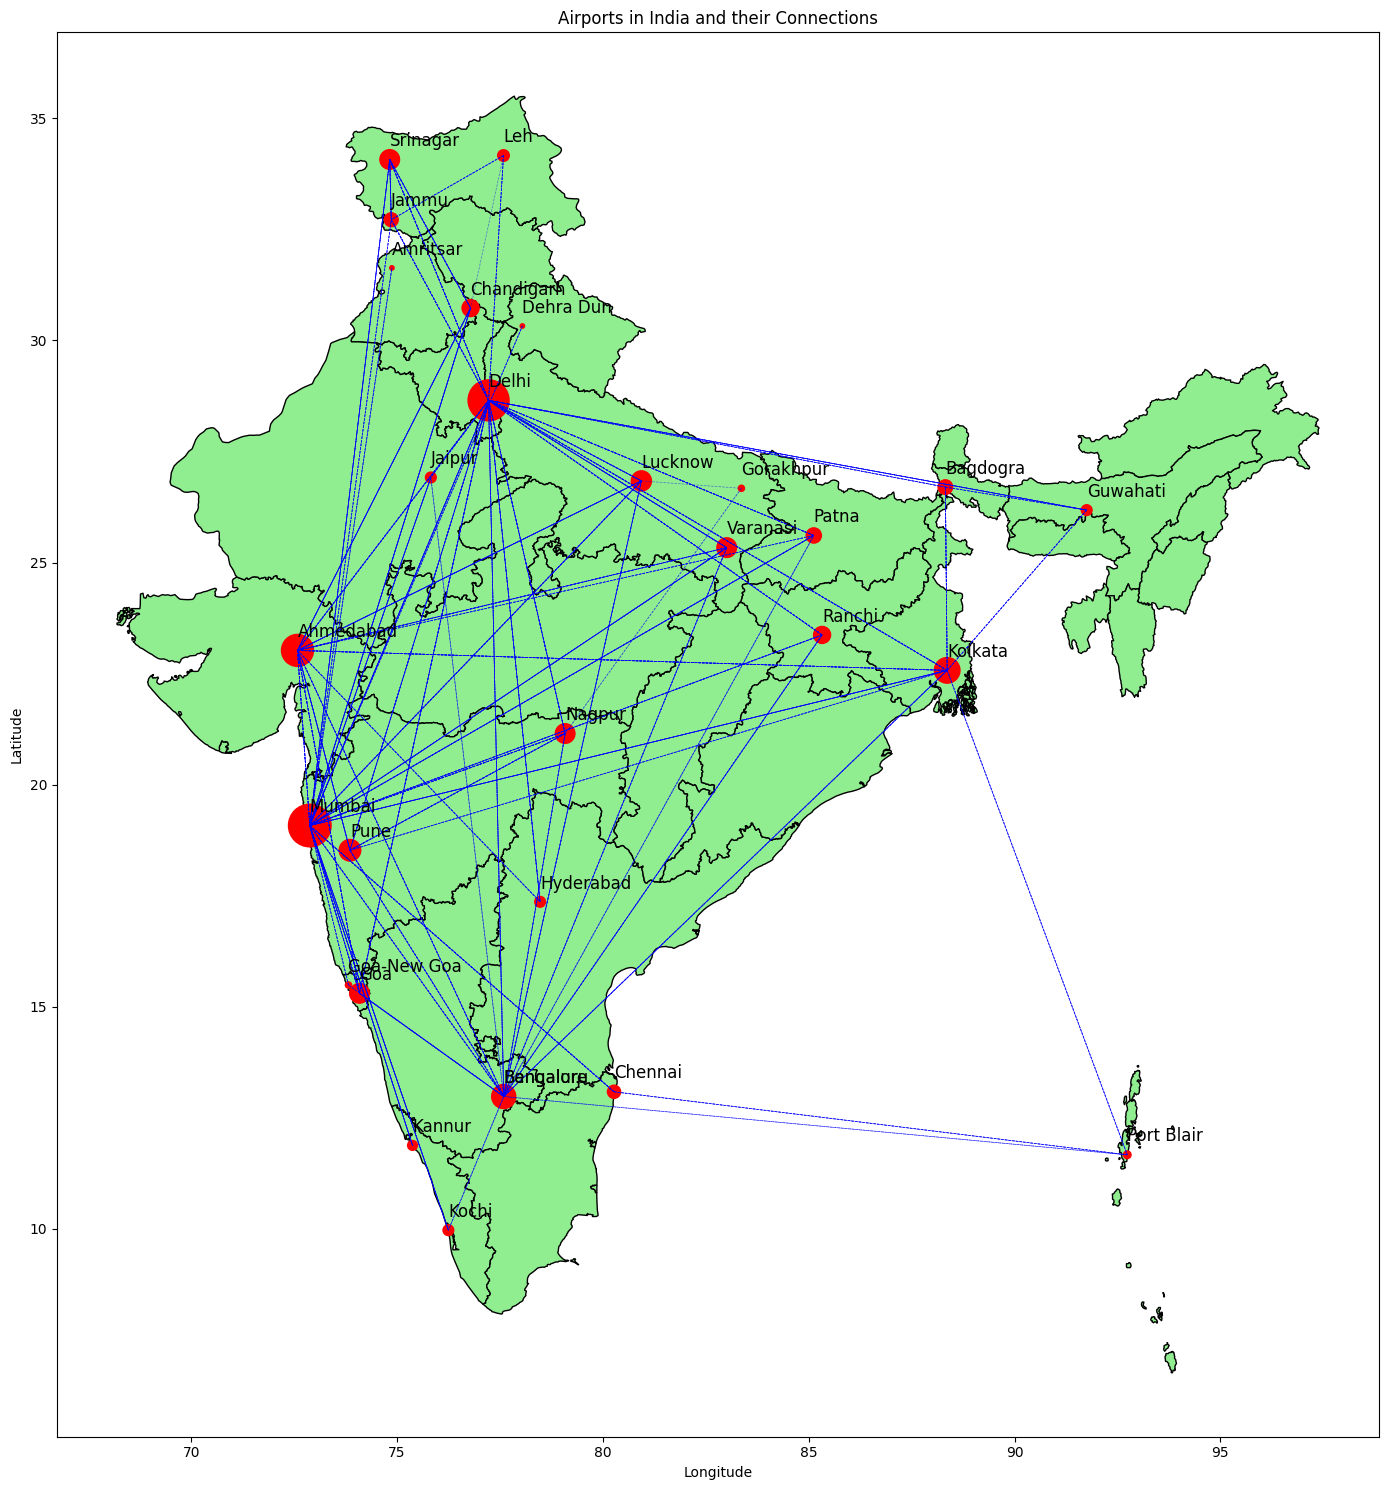

In [87]:
airports_df.crs = {'init': 'epsg:4326'}
india_map.crs = {'init': 'epsg:4326'}

# Plot the map of India
fig, ax = plt.subplots(figsize=(15,15))
india_map.plot(ax=ax, color='lightgreen', edgecolor = 'black')

# Plot the airports on the map of India





for i in range(len(airports_df)):
    for j in range(len(airports_df.iloc[i]['Connections'])):
        plt.plot([airports_df.iloc[i]['geometry'].x, city_df[city_df.City == airports_df.iloc[i]['Connections'][j]].iloc[0]['geometry'].x], [airports_df.iloc[i]['geometry'].y, city_df[city_df.City == airports_df.iloc[i]['Connections'][j]].iloc[0]['geometry'].y], color='blue', linewidth=0.5, alpha=0.5, linestyle='dashed')

airports_df.plot(ax=ax, markersize=airports_df['Size']*10, color='red', marker='o')

for i in range(len(airports_df)):
    plt.text(airports_df.iloc[i]['geometry'].x, airports_df.iloc[i]['geometry'].y+0.3, airports_df.iloc[i]['City'], fontsize=12)

plt.title("Airports in India and their Connections")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


/Users/sam/Library/Python/3.9/lib/python/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


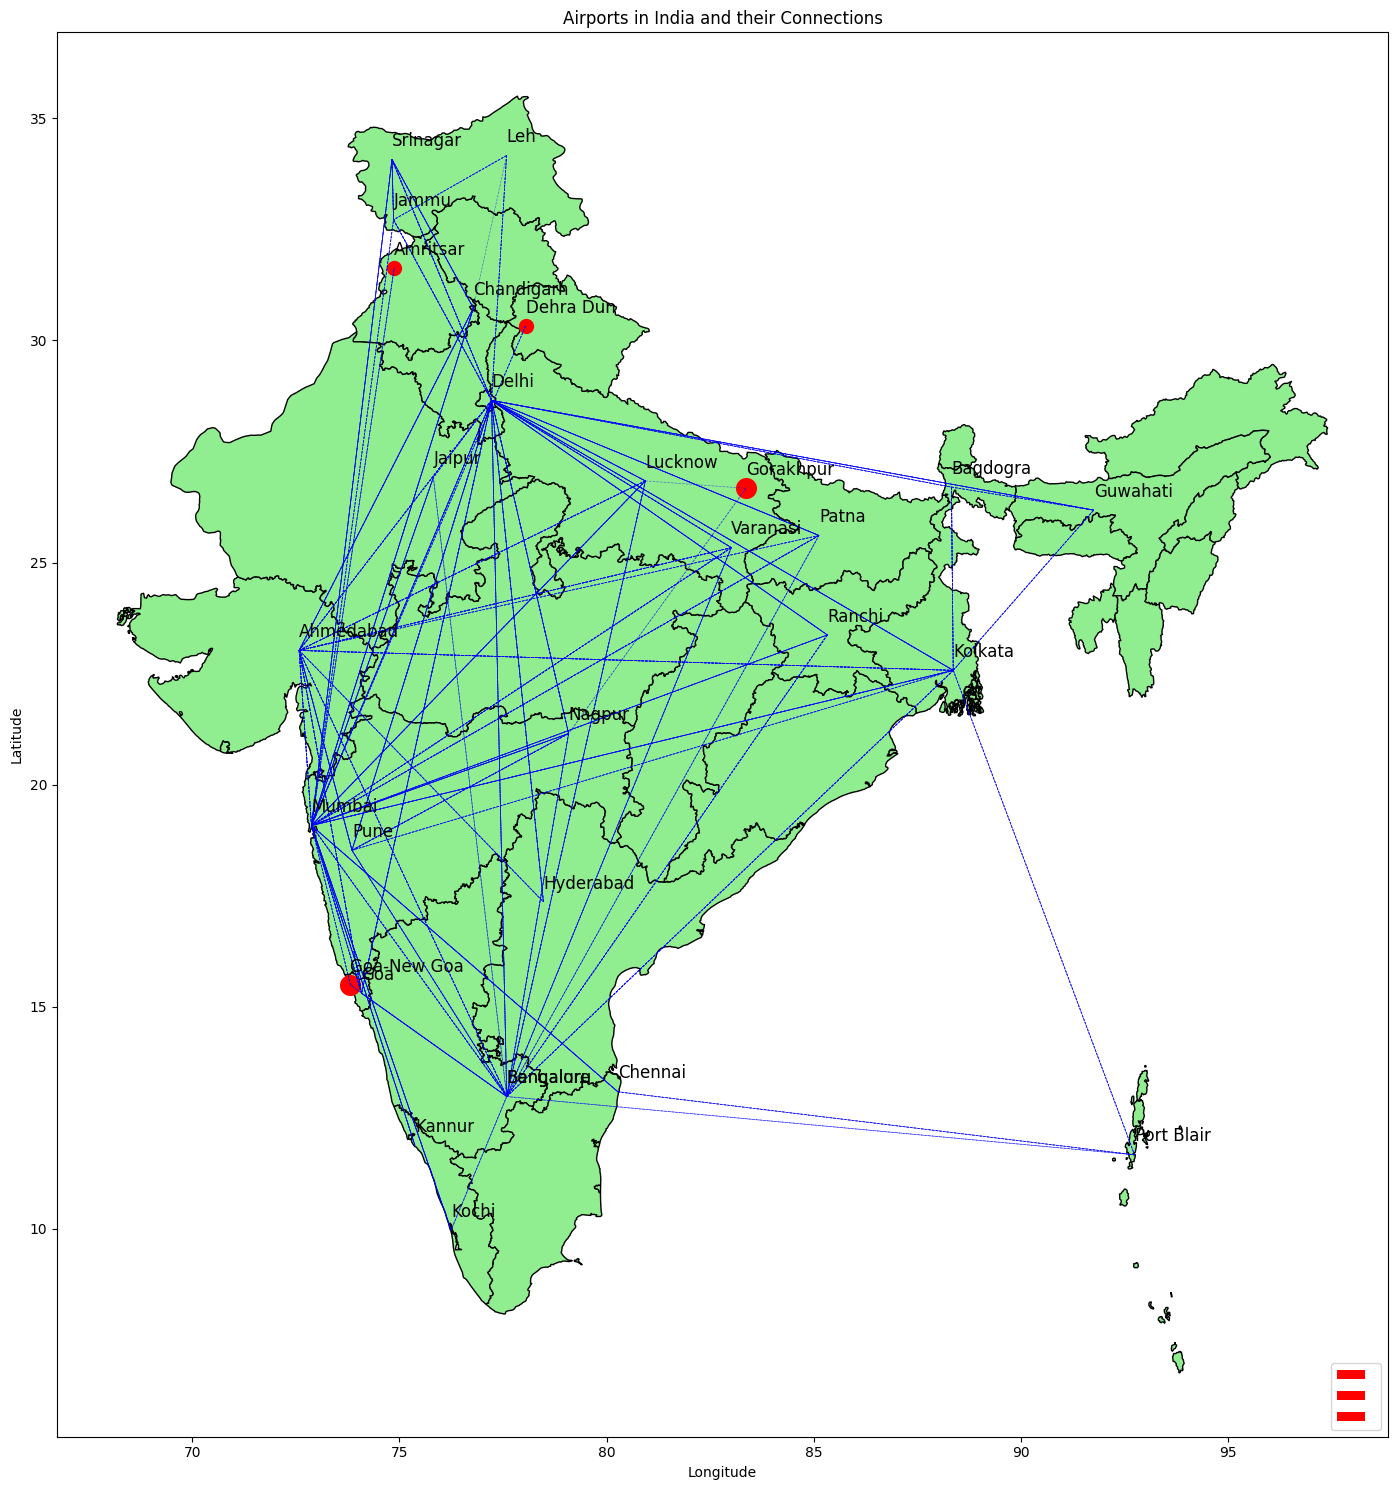

In [88]:
import matplotlib.patches as mpatches

# Define the sizes and colors for the legend
sizes = [5, 10, 20]
colors = ['red', 'red', 'red']

# Create a list of Patch objects for the legend
legend_patches = [mpatches.Circle((0, 0), radius=size, facecolor=color) for size, color in zip(sizes, colors)]

# Plot the map of India
fig, ax = plt.subplots(figsize=(15,15))
india_map.plot(ax=ax, color='lightgreen', edgecolor = 'black')

# Plot the airports on the map of India
for i in range(len(airports_df)):
    for j in range(len(airports_df.iloc[i]['Connections'])):
        plt.plot([airports_df.iloc[i]['geometry'].x, city_df[city_df.City == airports_df.iloc[i]['Connections'][j]].iloc[0]['geometry'].x], [airports_df.iloc[i]['geometry'].y, city_df[city_df.City == airports_df.iloc[i]['Connections'][j]].iloc[0]['geometry'].y], color='blue', linewidth=0.5, alpha=0.5, linestyle='dashed')

# Plot the bubble chart
for i in range(len(sizes)):
    airports_df[airports_df['Size']==i].plot(ax=ax, markersize=sizes[i]*10, color=colors[i], marker='o', label='{} Connections'.format(i))

for i in range(len(airports_df)):
    plt.text(airports_df.iloc[i]['geometry'].x, airports_df.iloc[i]['geometry'].y+0.3, airports_df.iloc[i]['City'], fontsize=12)

# Add the legend to the plot
plt.legend(handles=legend_patches, loc='lower right')

plt.title("Airports in India and their Connections")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()
